# Part I - (Loan Data From Prosper)
## by (MURHULA BYABUSHI Christian)

## Introduction
> This data set contains 113,937 loans with 81 variables on each loan, including loan amount, borrower rate (or interest rate), current loan status, borrower income, and many others. 

## Preliminary Wrangling


In [528]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

> Load in your dataset and describe its properties through the questions below. Try and motivate your exploration goals through this section.


In [529]:
#load datasets
loan_data_prosper = pd.read_csv('prosperLoanData.csv') 
loan_data_prosper.head()

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20


### Structure of the dataset

In [530]:
#Search the dimensions of the data
loan_data_prosper.shape 
print("This dataset have {} entries and {} variables ".format(loan_data_prosper.shape [0], loan_data_prosper.shape[1]))

This dataset have 113937 entries and 81 variables 


In [531]:
#get informations about the dataset
loan_data_prosper.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   ListingKey                           113937 non-null  object 
 1   ListingNumber                        113937 non-null  int64  
 2   ListingCreationDate                  113937 non-null  object 
 3   CreditGrade                          28953 non-null   object 
 4   Term                                 113937 non-null  int64  
 5   LoanStatus                           113937 non-null  object 
 6   ClosedDate                           55089 non-null   object 
 7   BorrowerAPR                          113912 non-null  float64
 8   BorrowerRate                         113937 non-null  float64
 9   LenderYield                          113937 non-null  float64
 10  EstimatedEffectiveYield              84853 non-null   float64
 11  EstimatedLoss

### The main feature of interest in the dataset

### What features in the dataset  will help support my investigation into your features of interest? 
I think that the employment status will affect on the loan amount original, and this one will similary affect the borrower rate. Also, the term   will depends on the loanOriginal, and the borrower return is affected by the one of loans. In addition, we going to notice how much the listing category influences his credit.


## Data assessing and cleaning

In [532]:
cols = ['ProsperRating (Alpha)','EmploymentStatus', 'ListingCategory (numeric)',
        'LoanOriginalAmount', 'LoanStatus','MonthlyLoanPayment',
        'BorrowerRate', 
         'BorrowerAPR',
        'EstimatedLoss','EstimatedReturn',
        'Term', 'StatedMonthlyIncome']

In [533]:
df_loan_data = loan_data_prosper[cols] 
df_loan_data 

,ProsperRating (Alpha),EmploymentStatus,ListingCategory (numeric),LoanOriginalAmount,LoanStatus,MonthlyLoanPayment,BorrowerRate,BorrowerAPR,EstimatedLoss,EstimatedReturn,Term,StatedMonthlyIncome
0,NaN,Self-employed,0,9425,Completed,330.43,0.1580,0.16516,NaN,NaN,36,3083.333333
1,A,Employed,2,10000,Current,318.93,0.0920,0.12016,0.0249,0.05470,36,6125.000000
2,NaN,Not available,0,3001,Completed,123.32,0.2750,0.28269,NaN,NaN,36,2083.333333
3,A,Employed,16,10000,Current,321.45,0.0974,0.12528,0.0249,0.06000,36,2875.000000
4,D,Employed,2,15000,Current,563.97,0.2085,0.24614,0.0925,0.09066,36,9583.333333
...,...,...,...,...,...,...,...,...,...,...,...,...
113932,C,Employed,1,10000,Current,364.74,0.1864,0.22354,0.0699,0.09500,36,4333.333333
113933,A,Employed,7,2000,FinalPaymentInProgress,65.57,0.1110,0.13220,0.0200,0.08070,36,8041.666667
113934,D,Employed,1,10000,Current,273.35,0.2150,0.23984,0.1025,0.08578,60,2875.000000
113935,C,Full-time,2,15000,Completed,449.55,0.2605,0.28408,0.0850,0.15950,60,3875.000000


##### By the following code, let's see the correction to be made in relation to the problems presented by the dataset

In [534]:
df_loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 12 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   ProsperRating (Alpha)      84853 non-null   object 
 1   EmploymentStatus           111682 non-null  object 
 2   ListingCategory (numeric)  113937 non-null  int64  
 3   LoanOriginalAmount         113937 non-null  int64  
 4   LoanStatus                 113937 non-null  object 
 5   MonthlyLoanPayment         113937 non-null  float64
 6   BorrowerRate               113937 non-null  float64
 7   BorrowerAPR                113912 non-null  float64
 8   EstimatedLoss              84853 non-null   float64
 9   EstimatedReturn            84853 non-null   float64
 10  Term                       113937 non-null  int64  
 11  StatedMonthlyIncome        113937 non-null  float64
dtypes: float64(6), int64(3), object(3)
memory usage: 10.4+ MB


In [535]:
#generate the simple statistic of null values in columns : 
df_loan_data.isnull().sum()

ProsperRating (Alpha)        29084
EmploymentStatus              2255
ListingCategory (numeric)        0
LoanOriginalAmount               0
LoanStatus                       0
MonthlyLoanPayment               0
BorrowerRate                     0
BorrowerAPR                     25
EstimatedLoss                29084
EstimatedReturn              29084
Term                             0
StatedMonthlyIncome              0
dtype: int64

In [536]:
#Count the number of duplicated entries
df_loan_data.duplicated().sum()

4870

In [537]:
#take all except that duplicated values
df_loan_data = df_loan_data[~df_loan_data.duplicated()]

In [538]:
df_loan_data.describe()

,ListingCategory (numeric),LoanOriginalAmount,MonthlyLoanPayment,BorrowerRate,BorrowerAPR,EstimatedLoss,EstimatedReturn,Term,StatedMonthlyIncome
count,109067.000000,109067.000000,109067.000000,109067.000000,109042.000000,80133.000000,80133.000000,109067.000000,1.090670e+05
mean,2.830462,8241.959603,270.174297,0.192614,0.218483,0.080147,0.096444,40.685927,5.631312e+03
std,4.047542,6230.981661,193.257299,0.074909,0.080467,0.046851,0.030786,10.370262,7.616981e+03
min,0.000000,1000.000000,0.000000,0.000000,0.006530,0.004900,-0.182700,12.000000,0.000000e+00
25%,1.000000,3659.000000,130.150000,0.133400,0.156005,0.042400,0.074080,36.000000,3.166667e+03
50%,1.000000,6000.000000,214.700000,0.184000,0.209525,0.070000,0.092400,36.000000,4.666667e+03
75%,3.000000,11500.000000,367.820000,0.250000,0.283700,0.112000,0.117300,36.000000,6.833333e+03
max,20.000000,35000.000000,2251.510000,0.497500,0.512290,0.366000,0.283700,60.000000,1.750003e+06


In [539]:
#Properating of ordered 
ranging_rating = ['AA', 'A', 'B', 'C', 'D', 'E', 'HR'] 
range_var  = pd.api.types.CategoricalDtype(ordered=True, categories =ranging_rating )
df_loan_data['ProsperRating (Alpha)'] = df_loan_data['ProsperRating (Alpha)'].astype(range_var)

C:\Users\ByabReseacher\AppData\Local\Temp\ipykernel_6860\2716597179.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_loan_data['ProsperRating (Alpha)'] = df_loan_data['ProsperRating (Alpha)'].astype(range_var)


In [540]:
df_loan_data = df_loan_data.rename(columns={df_loan_data.columns[2] : 'ListingCategorie'}) 

In [541]:
df_loan_data['ListingCategorie'] = df_loan_data['ListingCategorie'].astype(str)

In [542]:
#Function to attribute the corresponded value to each Listing Categorie
def parse_values(x): 
    if x=="0":
        return  "Not Available" 
    if x == "1":
        return  "Debt Consolidation"
    if x =="2" :
        return  "Home Improvement"
    if x =="3":
        return "Business"
    if x =="4":
        return "Personal Loan"
    if x =="5":
        return "Student Use"
    if x =="6":
        return "Auto"
    if x =="7":
        return "Other"
    if x =="8":
        return "Baby&Adoption"
    if x =="9":
        return "Boat"
    if x =="10":
        return "Cosmetic Procedure"
    if x =="11":
        return "Engagement Ring"
    if x =="12":
        return  "Green Loans"
    if x =="13":
        return  "Household Expenses"
    if x =="14":
        return  "Large Purchases"
    if x =="15":
        return  "Medical/Dental"
    if x =="16":
        return  "Motorcycle"
    if x =="17":
        return  "RV"
    if x =="18":
        return  "Taxes"
    if x =="19":
        return  "Vacation"
    if x =="20":
        return  "Wedding Loans"
    else:
        return x

In [543]:
df_loan_data.ListingCategorie = df_loan_data.ListingCategorie.apply(parse_values)

## Univariate Exploration

### How is the borrower interest ?

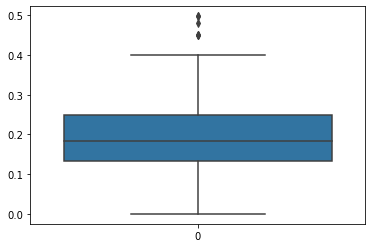

In [544]:
sb.boxplot(data = df_loan_data["BorrowerRate"]);

This chart shows us that the lowest borrow rate is 0%, the common is around 0.2, and the highest is 0.4. But some loans pay more than that, let's try to find their ratio by the following codes

In [545]:
#On calcule d'abord les quartiles:
Q1=df_loan_data["BorrowerRate"].quantile(0.25)
Q3=df_loan_data["BorrowerRate"].quantile(0.75)
print(Q1,Q3)

0.1334 0.25


In [546]:
# calculer le IQR
IQR=Q3-Q1
IQR

0.11660000000000001

In [547]:
# determiner la limite superieur et la limite inf
sup=Q3+1.5*IQR
inf=Q1-1.5*IQR
print(sup,inf)

0.4249 -0.04150000000000001


In [548]:
# Afficher les valeurs abberantes
bRate=df_loan_data[df_loan_data['BorrowerRate']>sup]
bRate

,ProsperRating (Alpha),EmploymentStatus,ListingCategorie,LoanOriginalAmount,LoanStatus,MonthlyLoanPayment,BorrowerRate,BorrowerAPR,EstimatedLoss,EstimatedReturn,Term,StatedMonthlyIncome
18326,NaN,NaN,Not Available,3000,Defaulted,153.21,0.4500,0.45857,NaN,NaN,36,10000.000000
22195,NaN,NaN,Not Available,1789,Chargedoff,91.37,0.4500,0.46201,NaN,NaN,36,2916.666667
36018,NaN,NaN,Not Available,1500,Completed,80.94,0.4975,0.51229,NaN,NaN,36,2838.000000
56761,NaN,NaN,Not Available,3000,Defaulted,161.88,0.4975,0.50633,NaN,NaN,36,0.000000
82043,NaN,NaN,Not Available,3000,Defaulted,158.66,0.4800,0.48873,NaN,NaN,36,1583.333333
103973,NaN,NaN,Not Available,2800,Defaulted,143.00,0.4500,0.45857,NaN,NaN,36,3750.000000


In [549]:
print("There  {} loans that return the best interest borrower rate". format(bRate.shape [0]))

There  6 loans that return the best interest borrower rate


<AxesSubplot:xlabel='BorrowerAPR'>

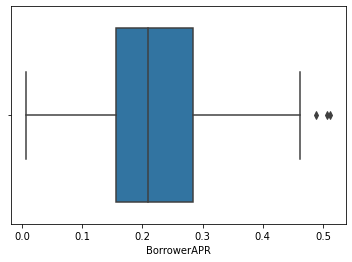

In [550]:
sb.boxplot(x =  df_loan_data.BorrowerAPR) 

By this simple plot its shown that some Borrowers receives as return more than the middle amount borrowed, however the frequent value is the 0.2 of interest borrow's amount.

### How much loans are frenquently delivred by borrowers ?

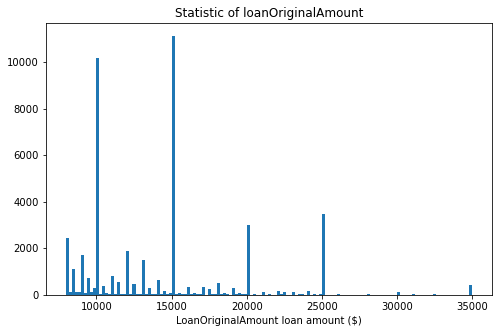

In [551]:
bins = np.arange(8000, df_loan_data.LoanOriginalAmount.max()+200, 200)
plt.figure(figsize=[8, 5])
plt.hist(data = df_loan_data, x = 'LoanOriginalAmount', bins = bins);
plt.xlabel('LoanOriginalAmount loan amount ($)'); 
plt.title('Statistic of loanOriginalAmount');  

Through this plot we can read notice that the high loan delivred by borrowers are around 10k and 15 k, and  1 k is frequency delivred. 

### How is the frequent payment of loans monthly ?

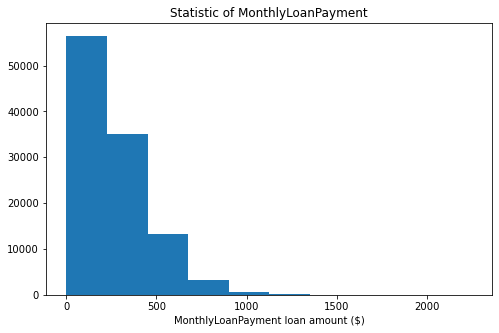

In [552]:
plt.figure(figsize=[8, 5])
plt.hist(data = df_loan_data, x = 'MonthlyLoanPayment');
plt.xlabel('MonthlyLoanPayment loan amount ($)'); 
plt.title('Statistic of MonthlyLoanPayment');

The plot shows that, monthly around 500 $ are payed.

### How is statitic of general payment reliazed for each loan status?

In [553]:
df_loan_data.LoanStatus

0                      Completed
1                        Current
2                      Completed
3                        Current
4                        Current
                   ...          
113932                   Current
113933    FinalPaymentInProgress
113934                   Current
113935                 Completed
113936                   Current
Name: LoanStatus, Length: 109067, dtype: object

In [554]:
nb_df_loan_data_loan_statu = df_loan_data['LoanStatus'].value_counts()

In [555]:
max_nb_df_loan_data_loan_statu = nb_df_loan_data_loan_statu[0]

In [556]:
#the proportion of the maw value 
proportion = max_nb_df_loan_data_loan_statu / df_loan_data.shape[0] 
tick_props = np.arange(0,proportion,0.05)
#reduce all the tickets at 100 percent 
tick_names = ['{:0.2f}'.format(i) for i in tick_props] 
type_order = nb_df_loan_data_loan_statu.index 

In [557]:
baseColor = baseColor = sb.color_palette()[4]

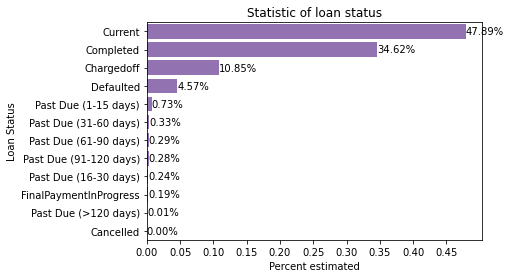

In [558]:
sb.countplot(data=df_loan_data, y='LoanStatus', color=baseColor, order =type_order);
plt.xticks (tick_props*df_loan_data.shape[0], tick_names);  

#handle percent
n_loan_statu = df_loan_data.shape[0]

for i in range(nb_df_loan_data_loan_statu.shape[0]): 
    count = nb_df_loan_data_loan_statu[i]
    loan_statu_string = '{:0.2f}%'.format(100*count/n_loan_statu) 
    plt.text(count, i, loan_statu_string, va ='center');

plt.title('Statistic of loan status'); 
plt.xlabel('Percent estimated');
plt.ylabel('Loan Status');

As we can see through this plot, the current status is the current status loan.

### What category of person contract frequently the loan ?

In [559]:
df_loan_data.ListingCategorie.value_counts()

Debt Consolidation    54010
Not Available         16860
Other                 10357
Home Improvement       7319
Business               7087
Auto                   2564
Personal Loan          2391
Household Expenses     1969
Medical/Dental         1501
Taxes                   879
Large Purchases         859
Vacation                762
Wedding Loans           757
Student Use             755
Motorcycle              302
Engagement Ring         214
Baby&Adoption           195
Cosmetic Procedure       91
Boat                     85
Green Loans              58
RV                       52
Name: ListingCategorie, dtype: int64

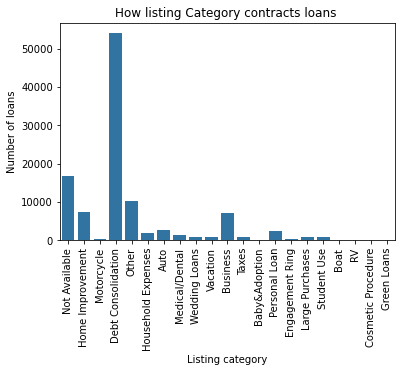

In [560]:
baseColor = sb.color_palette()[0] 
sb.countplot(data=df_loan_data, x='ListingCategorie', color=baseColor, ); 
plt.xticks(rotation = 90);
plt.title('How listing Category contracts loans '); 
plt.xlabel('Listing category');
plt.ylabel('Number of loans');

By looking at this survey we notice that, the listing category named to "Debt consolotion" is the most contracter of loans.

## Bivariate Exploration

### How is the the correlation between the loan amount and the borrower interest rate ?

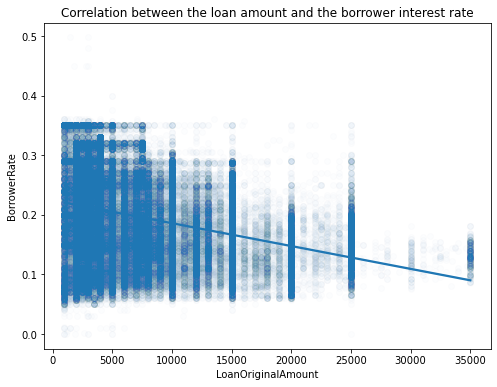

In [561]:
plt.figure(figsize = [8, 6])
sb.regplot(data = df_loan_data, x = 'LoanOriginalAmount', y = 'BorrowerRate', scatter_kws={'alpha':0.01}); 
plt.title("Correlation between the loan amount and the borrower interest rate");

This plot shows the loaOriginalAMount increases overtime, the Borrowerate decreases. The coorelation between both is negative

### Whitch loan amount every listing category has accumulated ? 

In [562]:
#function for set the size of figure
def figure_resize(f, w, h):
    f.set_figwidth(w)
    f.set_figheight(h)

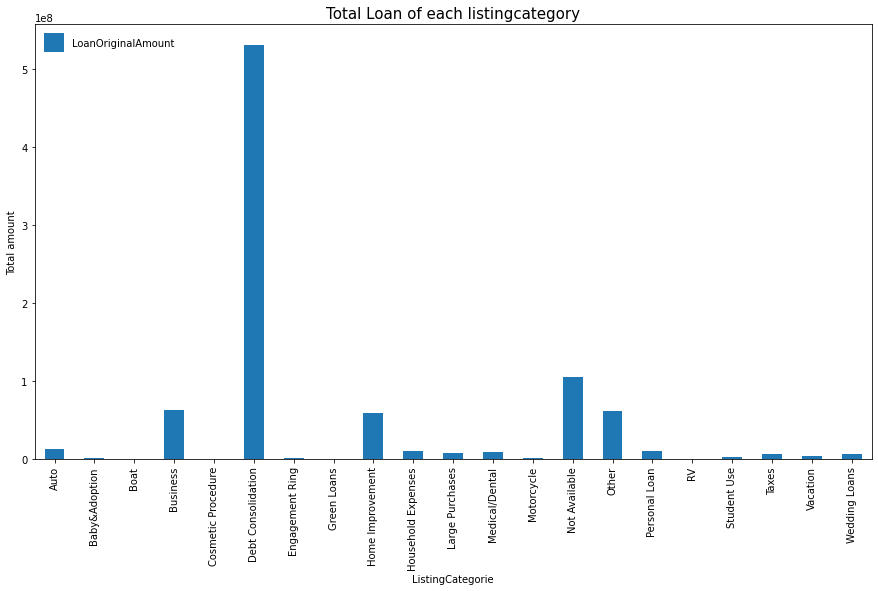

In [563]:
fig, ax = plt.subplots() 

#plot formatting
figure_resize(fig, 15,8)
plt.title('Total Loan of each listingcategory', fontsize=15)

df_loan_data.groupby('ListingCategorie', as_index = True)['LoanOriginalAmount'].sum().plot.bar() 


plt.legend(loc='upper left',ncol=2,handleheight=2.5, labelspacing=0.05, frameon=False) 
plt.ylabel('Total amount')
plt.show() 

By looking at this plot we notice that the loan contracted as debt Consolidation is estimated to 1 billion dollars 

### How is the coorelation between numerical variables inside of the data?

In [575]:
num_var = ['EstimatedReturn', 'EstimatedLoss', 'BorrowerAPR'
           , 'BorrowerRate', 'MonthlyLoanPayment', 'LoanOriginalAmount' ]

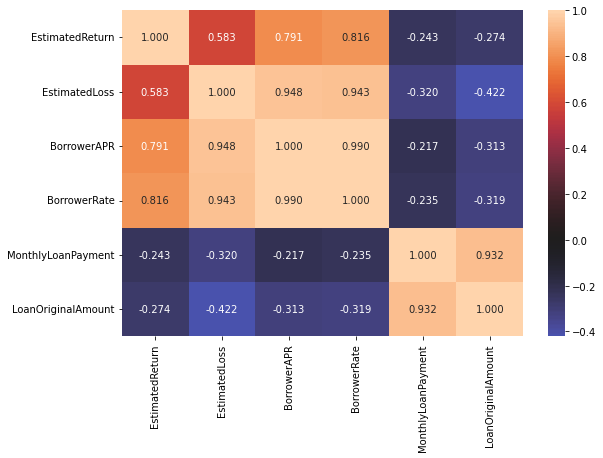

In [565]:
# correlation plot
plt.figure(figsize = [9, 6])
sb.heatmap(df_loan_data[num_var].corr(), annot = True, fmt = '.3f', center = 0);

Let experient the same result, with another kind of scatterplot

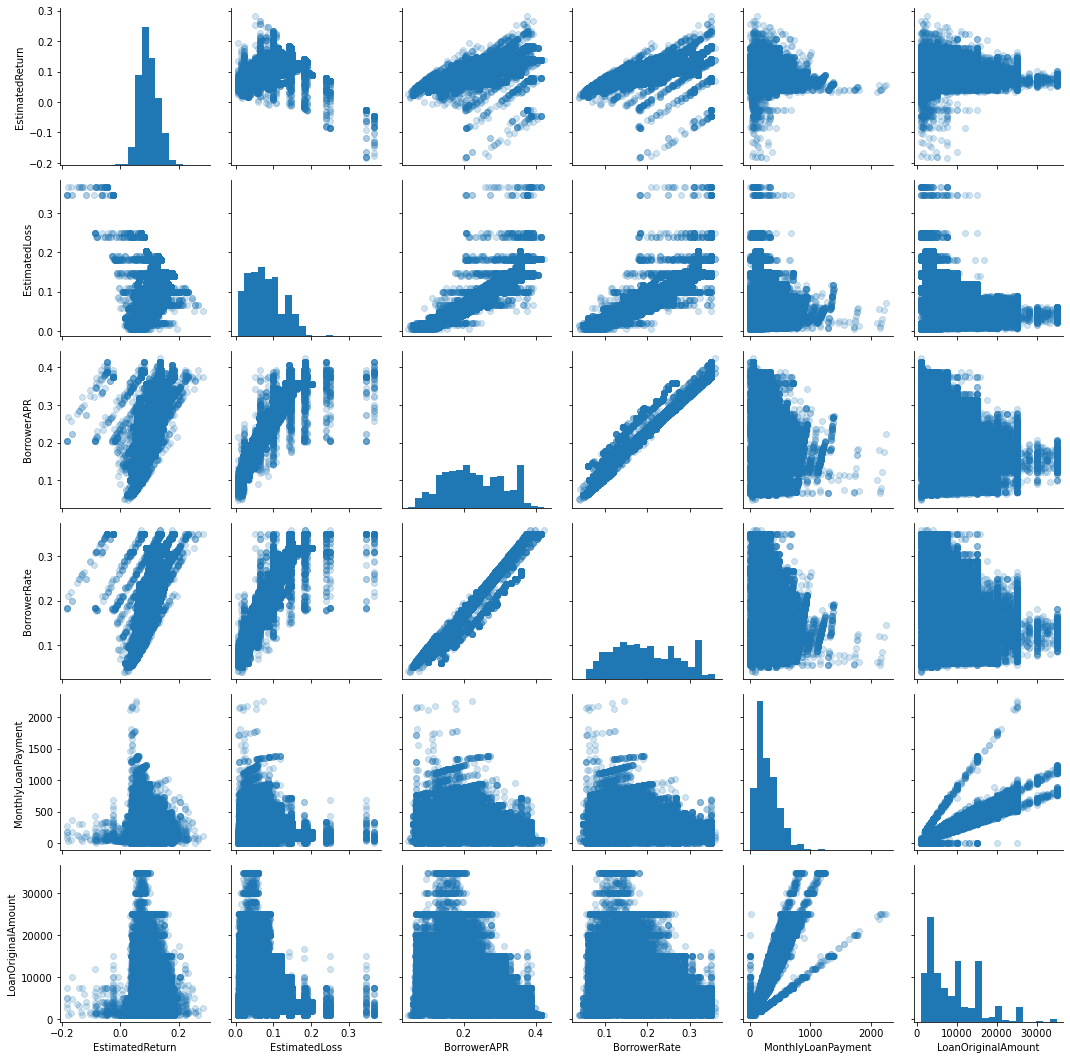

In [566]:
g = sb.PairGrid(data = df_loan_data.dropna(), vars = num_var)
g = g.map_diag(plt.hist, bins=20)
g.map_offdiag(plt.scatter, alpha=0.2);

The heatmap and the scatterplot plot shows that the LoanOriginalAmount with even the borrower rate nor borrowerAPR is negative, estimated at -0.3. This means as the LoanOrignalAmount increases, the BorrowerRate decreases.

### What is the duration of the loan offered by borrowers according to their status ?

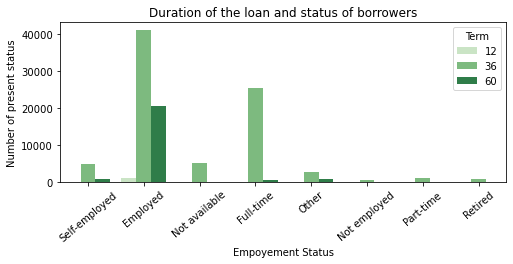

In [567]:
plt.figure(figsize = [8, 10])
ax = plt.subplot(3, 1, 2)
sb.countplot(data = df_loan_data, x = 'EmploymentStatus', hue = 'Term', palette ="Greens") 
plt.ylabel("Number of present status"); 
plt.xlabel("Empoyement Status"); 
plt.title("Duration of the loan and status of borrowers");
plt.xticks(rotation=40);


The graph shows that borrowers who are salaried most often grant the loan estimated at 36 and 60 for the others.

In [568]:
df_loan_data.info() 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 109067 entries, 0 to 113936
Data columns (total 12 columns):
 #   Column                 Non-Null Count   Dtype   
---  ------                 --------------   -----   
 0   ProsperRating (Alpha)  80133 non-null   category
 1   EmploymentStatus       106823 non-null  object  
 2   ListingCategorie       109067 non-null  object  
 3   LoanOriginalAmount     109067 non-null  int64   
 4   LoanStatus             109067 non-null  object  
 5   MonthlyLoanPayment     109067 non-null  float64 
 6   BorrowerRate           109067 non-null  float64 
 7   BorrowerAPR            109042 non-null  float64 
 8   EstimatedLoss          80133 non-null   float64 
 9   EstimatedReturn        80133 non-null   float64 
 10  Term                   109067 non-null  int64   
 11  StatedMonthlyIncome    109067 non-null  float64 
dtypes: category(1), float64(6), int64(2), object(3)
memory usage: 14.1+ MB


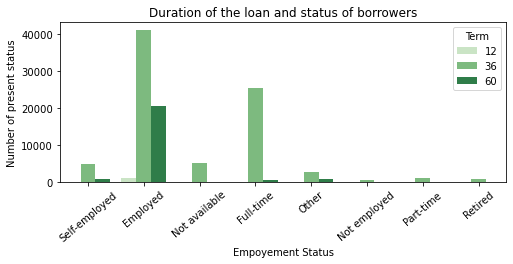

In [569]:
plt.figure(figsize = [8, 10])
ax = plt.subplot(3, 1, 2)
sb.countplot(data = df_loan_data, x = 'EmploymentStatus', hue = 'Term', palette ="Greens") 
plt.ylabel("Number of present status"); 
plt.xlabel("Empoyement Status"); 
plt.title("Duration of the loan and status of borrowers");
plt.xticks(rotation=40);

In [570]:
df_loan_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 109067 entries, 0 to 113936
Data columns (total 12 columns):
 #   Column                 Non-Null Count   Dtype   
---  ------                 --------------   -----   
 0   ProsperRating (Alpha)  80133 non-null   category
 1   EmploymentStatus       106823 non-null  object  
 2   ListingCategorie       109067 non-null  object  
 3   LoanOriginalAmount     109067 non-null  int64   
 4   LoanStatus             109067 non-null  object  
 5   MonthlyLoanPayment     109067 non-null  float64 
 6   BorrowerRate           109067 non-null  float64 
 7   BorrowerAPR            109042 non-null  float64 
 8   EstimatedLoss          80133 non-null   float64 
 9   EstimatedReturn        80133 non-null   float64 
 10  Term                   109067 non-null  int64   
 11  StatedMonthlyIncome    109067 non-null  float64 
dtypes: category(1), float64(6), int64(2), object(3)
memory usage: 14.1+ MB


## Multivariate Exploration

### How is the relationship between the loanOriginalAmount and Borrower annually?

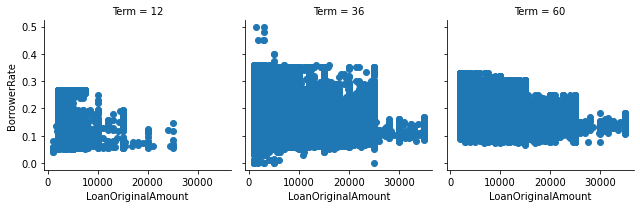

In [571]:
g=sb.FacetGrid(data=df_loan_data,col='Term') 
g.map(plt.scatter,'LoanOriginalAmount','BorrowerRate');

These graphs show that for each range of term represented (12, 36, 60 months), the borrowing rate is negatively correlated with the initial amount of the loan. 

###  How is the income monthly accoring to each loan status ?

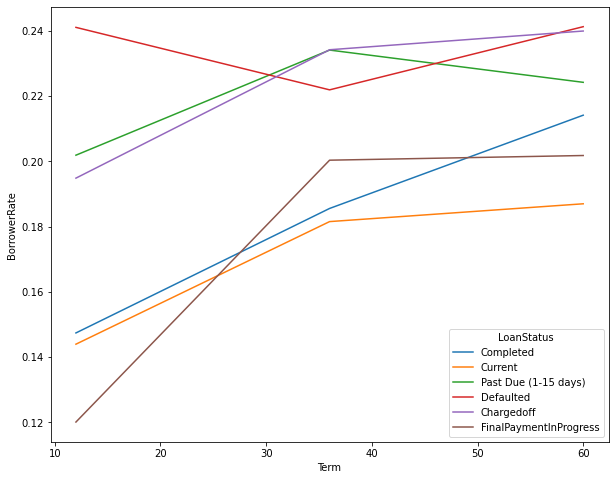

In [572]:
df_loan_data_selected_status = df_loan_data.loc[df_loan_data['LoanStatus'].isin(['Completed','Current', 'Chargedoff','Defaulted',
                                                                          'FinalPaymentInProgress', 'Past Due (1-15 days)'])] 
plt.figure(figsize=(10,8))
g=sb.lineplot(data=df_loan_data_selected_status, x='Term', y='BorrowerRate', hue='LoanStatus',ci=None);

The chart above shows how the borrowing rate differs by loan status over 60 months.

### What's amount can each borrower realize according to his and loan status ?

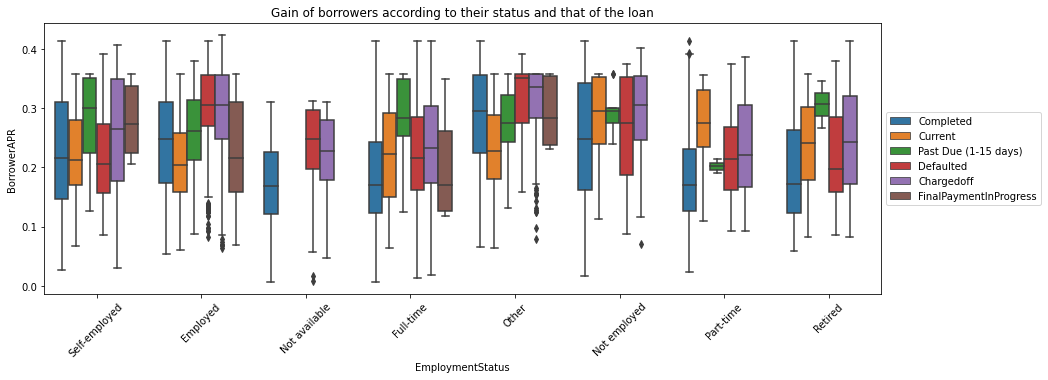

In [573]:
plt.figure(figsize=[15, 5])
sb.boxplot(data=df_loan_data_selected_status,x='EmploymentStatus',y='BorrowerAPR',hue='LoanStatus',dodge=0.3);
plt.xticks(rotation=45); 
plt.title('Gain of borrowers according to their status and that of the loan')
plt.legend(loc = 6, bbox_to_anchor = (1.0, 0.5)) ;

Considering the self-employed, the graph shows that he earns about 0.45 at maximum, 0.25 on average, and at least 0.05 of the loan amount, when the loan status is over.

### What is the borrower's loan status rate based on their prosperity rating?

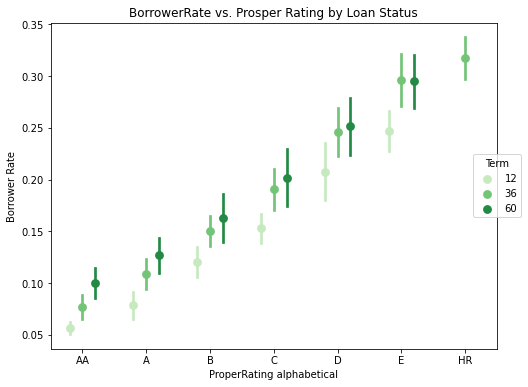

In [576]:
fig = plt.figure(figsize = [8,6])
ax = sb.pointplot(data = df_loan_data_selected_status, x = 'ProsperRating (Alpha)', y = 'BorrowerRate', hue = 'Term',
           palette = 'Greens', linestyles = '', dodge = 0.4, ci='sd')
plt.title('BorrowerRate vs. Prosper Rating by Loan Status')
plt.ylabel('Borrower Rate') 
plt.xlabel('ProperRating alphabetical')
plt.legend(loc = 10, title="Term", bbox_to_anchor = (1.0, 0.5)) ;
plt.show();


This graph shows that the standard deviation of each properRating depends each one during a all terms represented(12,36 and 60 months). Obsiouly the properrating with HR return a higher rate interest.

## Conclusion

In this investigation, we worked on 113,937 loans with in particular 11 variables which interested our research, such as the borrowing rate, the status of the loan, the duration, the APR of the borrower, etc.
To have a refined dataset, we explored the data, cleaning up duplicate entries where necessary.
In addition, we wanted to answer a list of questions to which we offered hypothetical answers. by tracing the behavior of variables by univariate, bivariate and multivariate graph.
The results found led us to conclude that borrowers grant a certain loan based on credibility and this often varies by at least 1K. And each time the loan is credible, it pays more.
We have also noticed that certain variables such as the initial amount of the loan when increases, the borrwoerRate decreases.